In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


[Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

In [ ]:
# Load the training dataset
df_train = pd.read_csv("/content/House_price_train.csv")
df_train.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# load the testing dataset
df_test = pd.read_csv("/content/House_price_test.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Check for basic information of the training dataset
df_train.shape

(1460, 81)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Summary statistics for training data
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Calculate missing values in training data
missing_train = df_train.isnull().sum()
missing_train = missing_train[missing_train > 0]  # Filter columns with missing values
missing_train

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


Since lot of data is missing for some columns, dropping those columns.


In [ ]:
# drop the columns with many missing data
df_train = df_train.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
df_train.shape

(1460, 75)

In [ ]:
# Check the basic information for testing dataset

df_test.shape

(1459, 80)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
# calculate the missing values in the test dataset
missing_test = df_test.isnull().sum()
missing_test = missing_test[missing_test > 0]
missing_test

,0
MSZoning,4
LotFrontage,227
Alley,1352
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,894
MasVnrArea,15
BsmtQual,44
BsmtCond,45


In [ ]:
# drop the columns with many missing data
df_test = df_test.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
df_test.shape

(1459, 74)

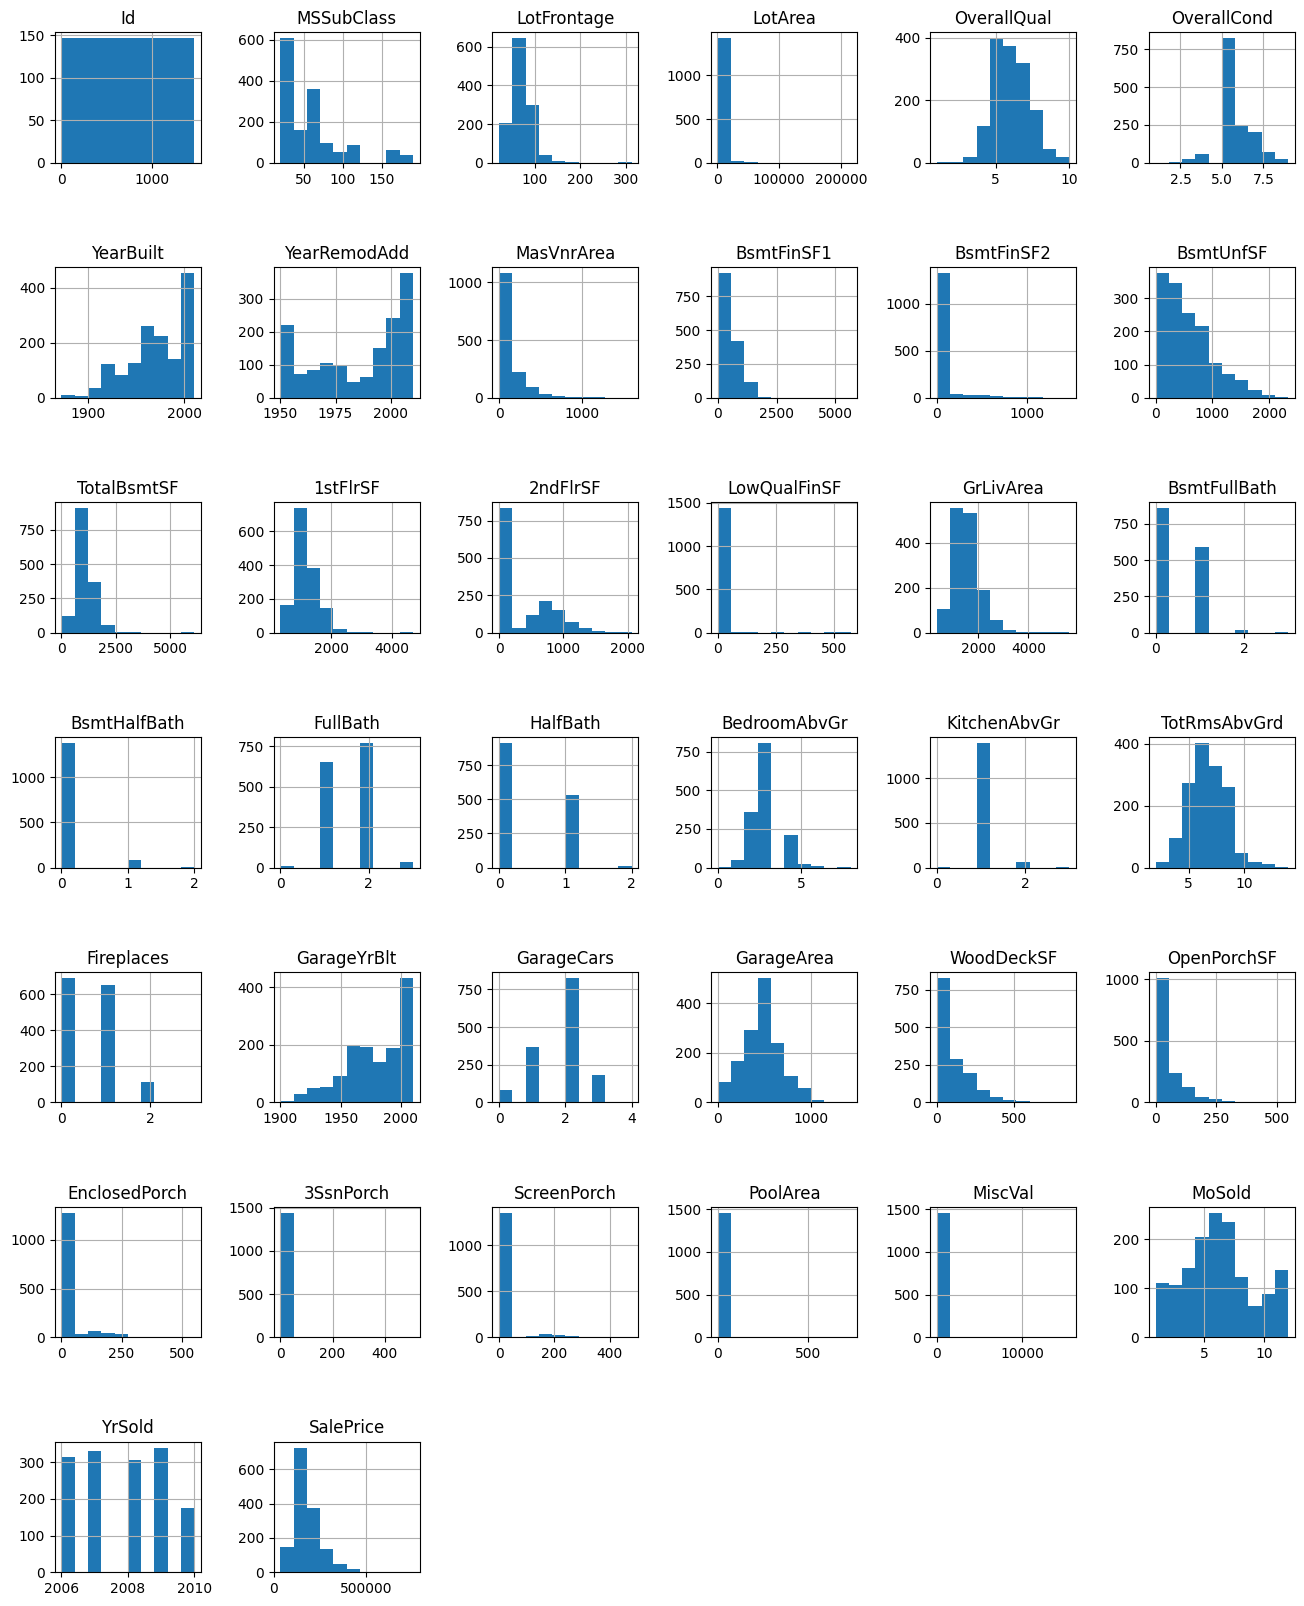

In [ ]:
# Univariate analysis - Distribution of numerical features

df_train.hist(figsize=(16,20))
plt.subplots_adjust(wspace=0.5, hspace=0.8)
plt.show()

<ipython-input-15-9c1077c6da82>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8,5,i+1)


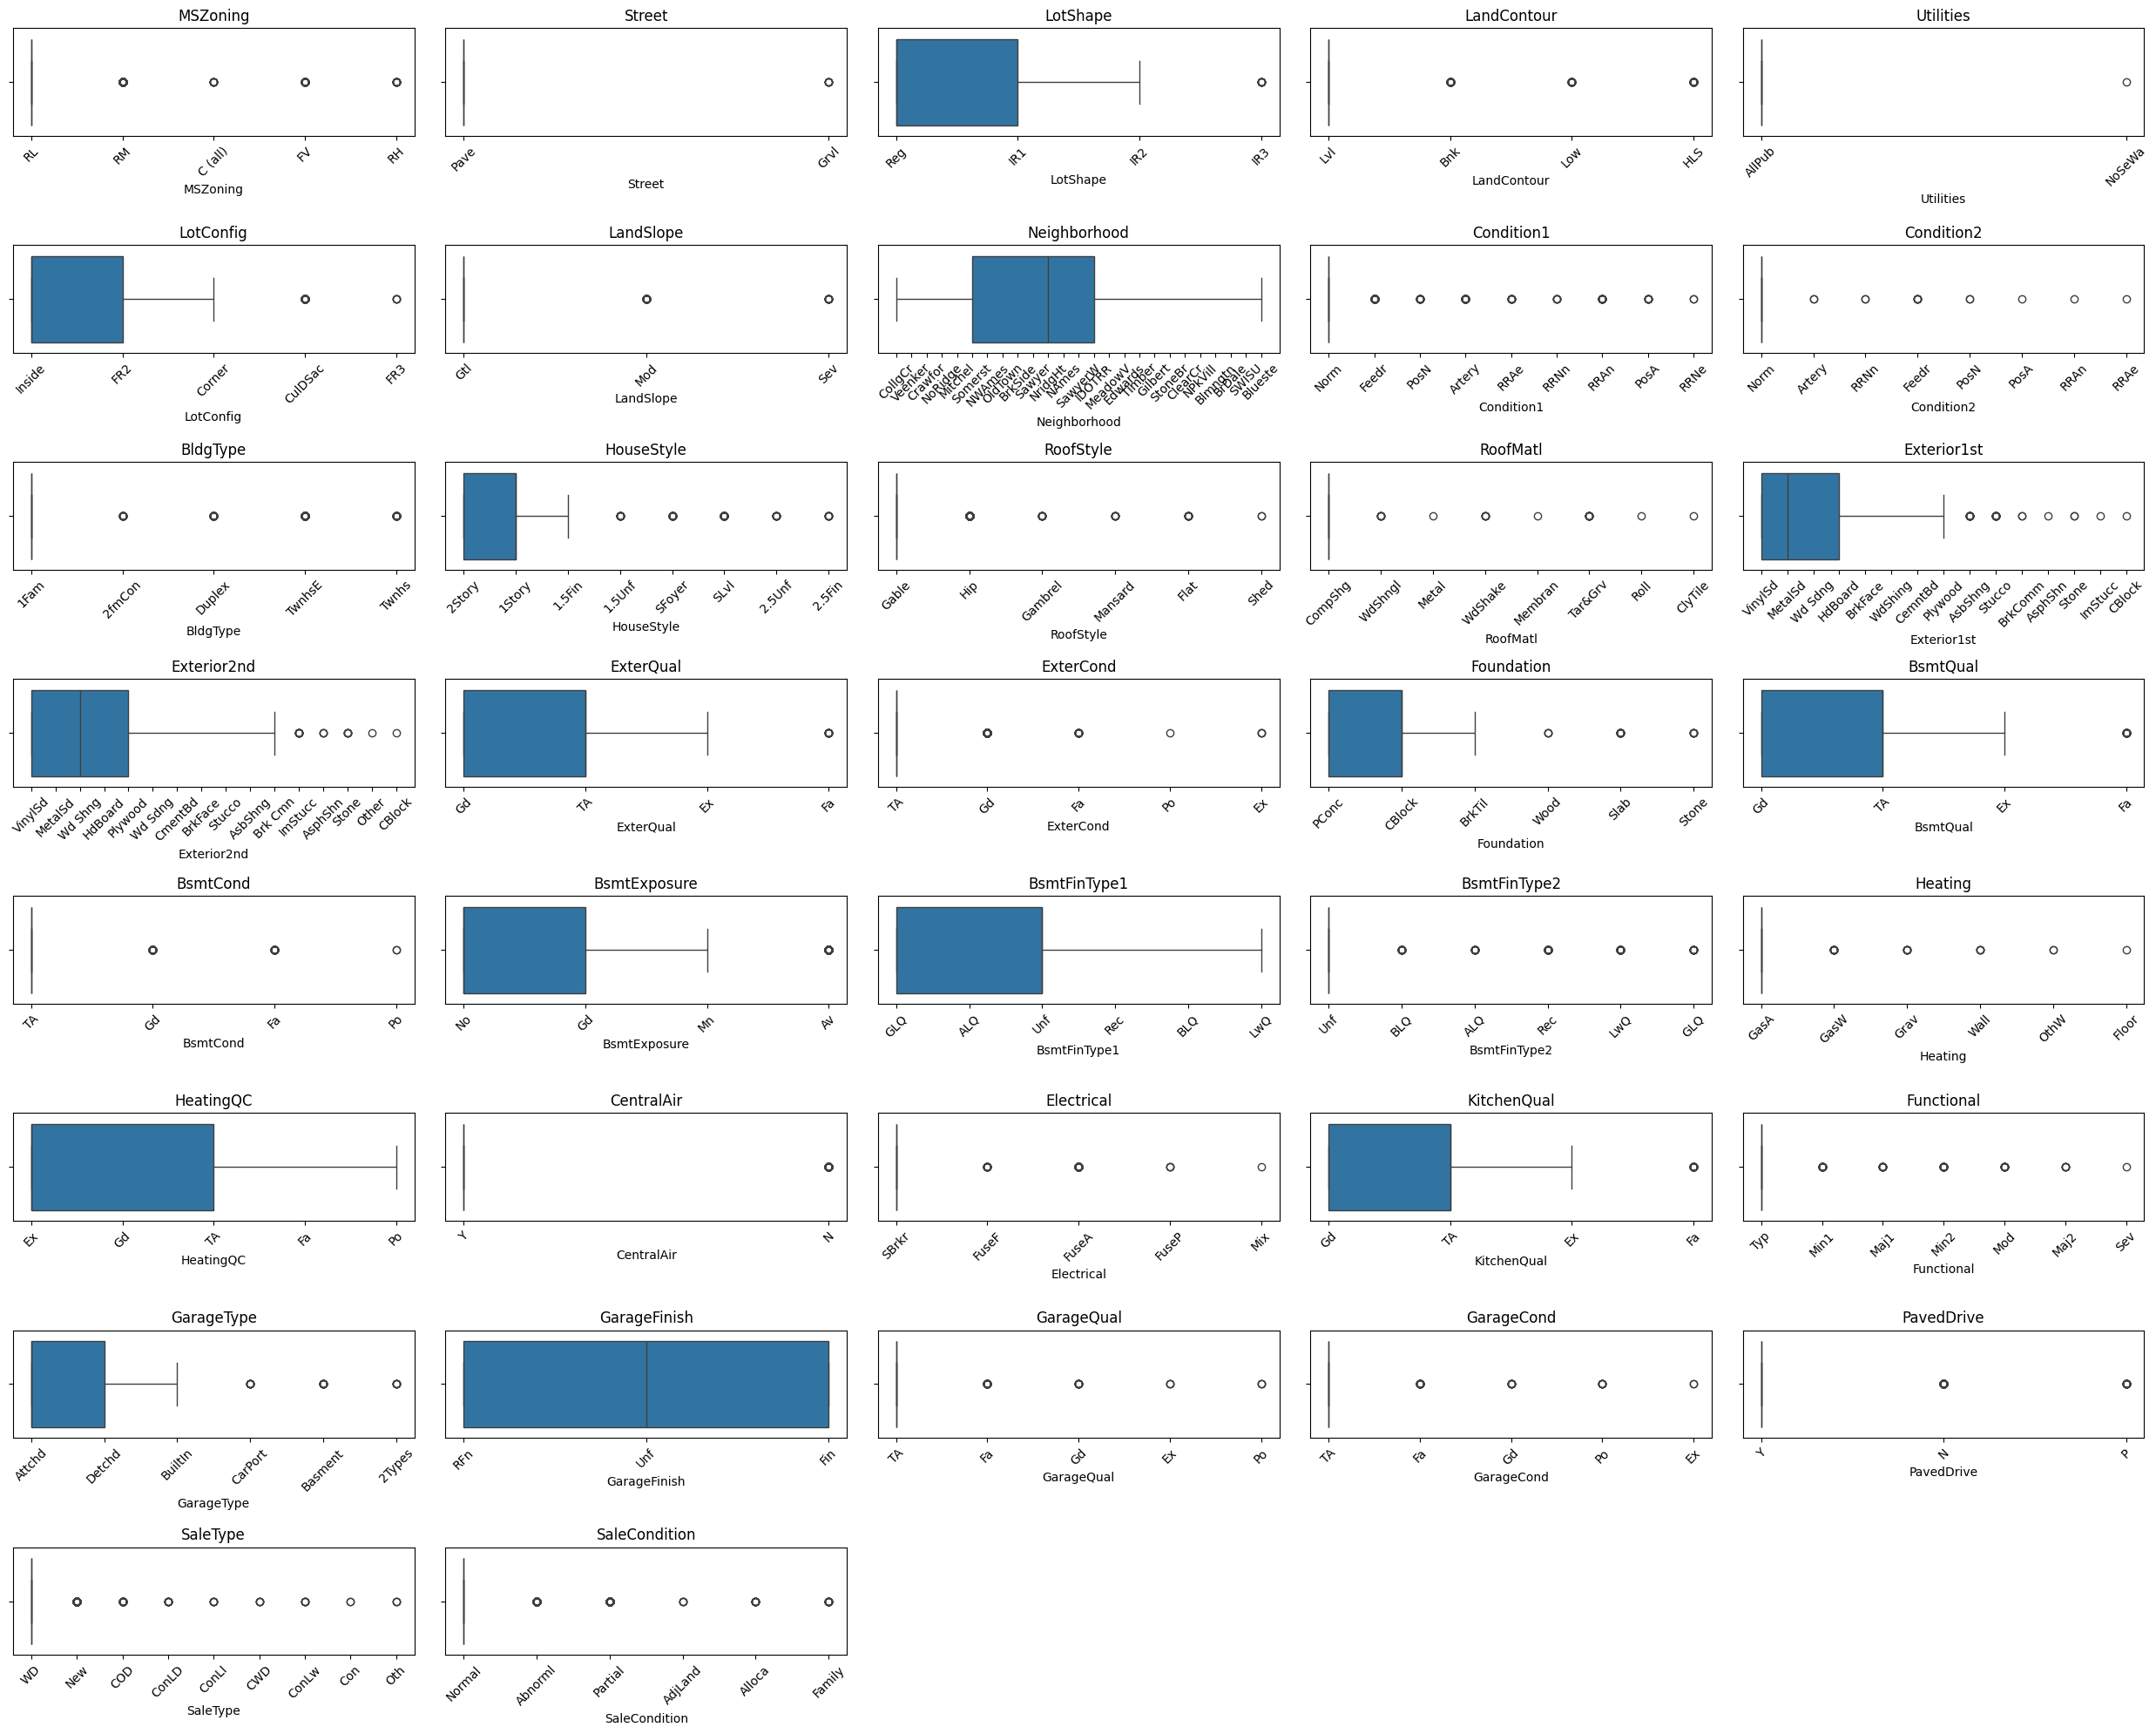

In [ ]:
# distribution using boxplot for all categorical features using subplot
categorical_features = df_train.select_dtypes(include=['object']).columns

# convert categorical_features to data frame
cate_features = df_train[categorical_features]
plt.figure(figsize=(25,20))
plt.subplots_adjust(wspace=0.5, hspace=0.8)
sns.boxplot(data=df_train[categorical_features])
for i, col in enumerate(df_train[categorical_features].columns):
    plt.subplot(8,5,i+1)
    sns.boxplot(x=df_train[col])
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Numerical values
numerical_features_train = df_train.select_dtypes(include=['int64', 'float64']).columns
numerical_features_test = df_test.select_dtypes(include=['int64', 'float64']).columns
print(numerical_features_train)
print(numerical_features_test)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt',

In [ ]:
# fill  the misssing value of numerical features with median values
median_values_train = df_train[numerical_features_train].median()
median_values_test = df_test[numerical_features_test].median()

numerical_features_train = df_train[numerical_features_train].fillna(median_values_train)
numerical_features_test= df_test[numerical_features_test].fillna(median_values_test)

In [ ]:
numerical_features_train.isnull().sum()

,0
Id,0
MSSubClass,0
LotFrontage,0
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,0
BsmtFinSF1,0


In [ ]:
numerical_features_test.isnull().sum()

,0
Id,0
MSSubClass,0
LotFrontage,0
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,0
BsmtFinSF1,0


In [ ]:
#categorical values
categorical_features_train = df_train.select_dtypes(include=['object']).columns
categorical_features_test = df_test.select_dtypes(include=['object']).columns
print(categorical_features_train)
print(categorical_features_test)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electric

In [ ]:
# fill the missing value of categorical columns with mode value
mode_values_train = df_train[categorical_features].mode().iloc[0]
mode_values_test = df_test[categorical_features].mode().iloc[0]
df_train[categorical_features] = df_train[categorical_features].fillna(mode_values_train)
df_test[categorical_features] = df_test[categorical_features].fillna(mode_values_test)

In [ ]:
df_train[categorical_features].isnull().sum()

,0
MSZoning,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0
Condition2,0


In [ ]:
df_test[categorical_features].isnull().sum()

,0
MSZoning,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0
Condition2,0


In [ ]:
df_train[categorical_features].nunique()

,0
MSZoning,5
Street,2
LotShape,4
LandContour,4
Utilities,2
LotConfig,5
LandSlope,3
Neighborhood,25
Condition1,9
Condition2,8


# Model Evaluation
Random forest and gradient boosting algorithms are generally not affected by feature scaling, so feature scaling is not done.

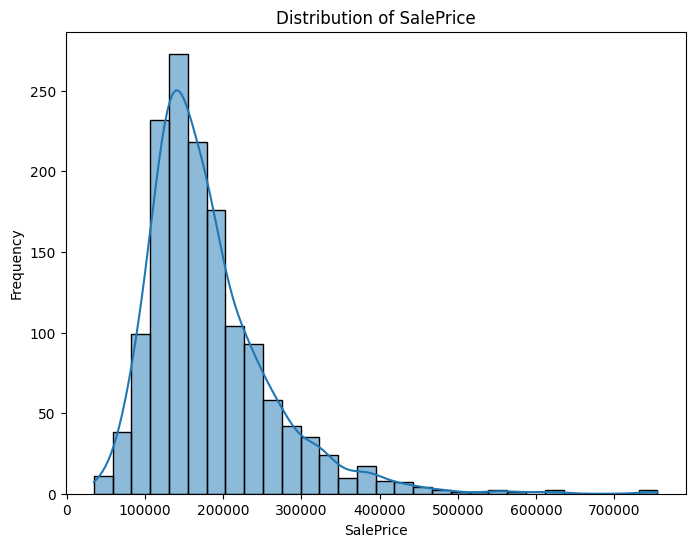

In [ ]:
# Distribution of the target variable using histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_train['SalePrice'], bins=30, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

The distribution is right skewed.

Real estate prices often have a right-skewed distribution (i.e., most houses are relatively inexpensive, but a few are extremely expensive). Log transformation helps in reducing this skewness, making the data distribution more symmetric and making the model's performance more interpretable.





In [ ]:
# Log transformation of SalePrice


#Machine learning
X_train = df_train.drop(['SalePrice'], axis=1)
y_train = df_train['SalePrice']
y_train_log = np.log1p(y_train)
X_test = df_test
print (X_train.shape, y_train_log.shape,X_test.shape)




(1460, 74) (1460,) (1459, 74)


In [ ]:
# Convert string columns in X_train and X_test to numeric using one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(df_test)

#Align the columns in X_train and X_test
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

# check for NaN values after alignment and handle them if necessary
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Linear Regression algorithm
model_lr= LinearRegression()
model_lr.fit(X_train, y_train_log)



# test the predictions
y_test_log_pred = model_lr.predict(X_test)
y_test_pred = np.expm1(y_test_log_pred)  # inverse log transformation
print(y_test_pred)


[115904.95735947 135892.48114008 173911.1611947  ... 156350.96072219
 109776.70904786 215442.44312095]


# Validating the model

In [ ]:
# Validating the model

from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(
    X_train, y_train_log, test_size=0.2, random_state=42)

# Initialize and train the model
model_lr_val = LinearRegression()
model_lr_val.fit(X_train_split, y_train_split)  # The target variable is already log transformed

# Predict on the validation set
y_valid_pred_log = model_lr_val.predict(X_valid_split)
y_valid_pred = np.expm1(y_valid_pred_log)  # Transform back to original scale

In [ ]:
# Compute RMSE on log-transformed values
rmse_lr_log = np.sqrt(mean_squared_error(np.log1p(y_valid_split), y_valid_pred_log))
print(f'Validation RMSE: {rmse_lr_log}')

Validation RMSE: 9.443148897589849


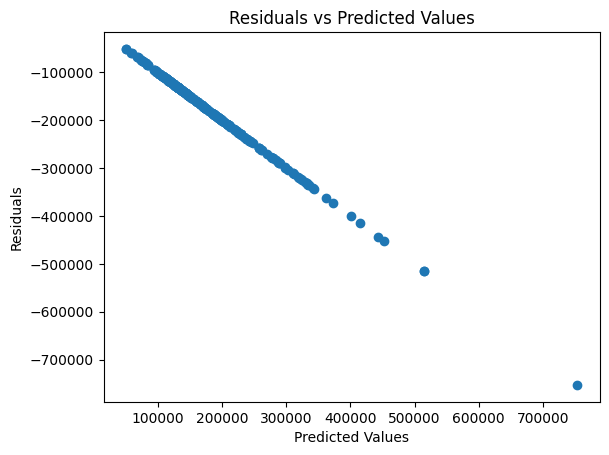

In [ ]:
# Residual Analysis

residuals = y_valid_split - y_valid_pred
plt.scatter(y_valid_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

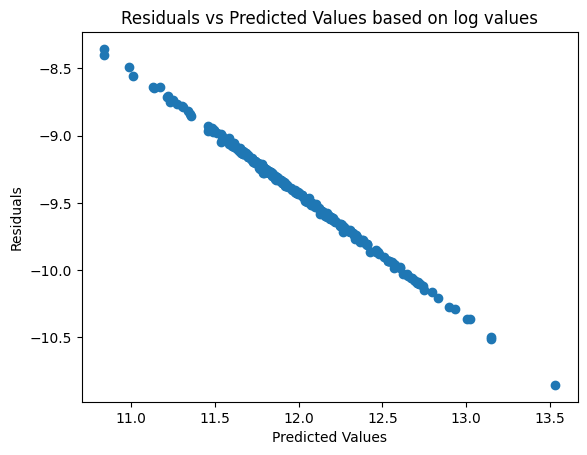

In [ ]:
# Residuals based on log values
residuals = np.log1p(y_valid_split) - y_valid_pred_log
plt.scatter(y_valid_pred_log, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values based on log values')
plt.show()

In [ ]:
# Train multiple models
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()

rf_model.fit(X_train, y_train_log)
gb_model.fit(X_train, y_train_log)

# Make predictions
rf_pred = rf_model.predict(X_valid_split)
gb_pred = gb_model.predict(X_valid_split)

rmse_rf_log = np.sqrt(mean_squared_error(np.log1p(y_valid_split), y_valid_pred_log))
rmse_gb_log = np.sqrt(mean_squared_error(np.log1p(y_valid_split), y_valid_pred_log))
print(f'Validation RMSE_RF: {rmse_rf_log}')
print(f'Validation RMSE_GB: {rmse_gb_log}')

Validation RMSE_RF: 9.443148897589849
Validation RMSE_GB: 9.443148897589849


In [ ]:
# Average predictions from both models
final_pred_log = (rf_pred + gb_pred) / 2
final_pred = np.expm1(final_pred_log)

# Calculate RMSE
final_rmse = np.sqrt(mean_squared_error(np.log1p(y_valid_split), final_pred_log))
print(f'Ensemble RMSE: {final_rmse}')

Ensemble RMSE: 9.440669001074898


In [ ]:

# Create submission DataFrame
submission = pd.DataFrame({
    'Id': df_test['Id'],  # Test data should include an 'Id' column
    'SalePrice': y_test_pred
})

# Save to CSV
submission.to_csv('submission.csv', index=False)